In [4]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

In [2]:
# Read CSV
df = pd.read_csv("raw_data/FI_Case_Data.csv")
#display the whole dataframe
df.head()

,Data,Year,Month,Value
0,Consumer Price Index,1947,1,21.48
1,Consumer Price Index,1947,2,21.62
2,Consumer Price Index,1947,3,22.00
3,Consumer Price Index,1947,4,22.00
4,Consumer Price Index,1947,5,21.95


## Data cleaning

In [3]:
#number of records and columns
df.shape

(1948, 4)

In [4]:
# strip the white space from the dataframe headers
print(df.columns)
df.columns=df.columns.str.strip()
print(df.columns)


Index(['Data', 'Year', 'Month ', 'Value'], dtype='object')
Index(['Data', 'Year', 'Month', 'Value'], dtype='object')


In [5]:
#unique counts of data
df.Data.value_counts()

Unemployment Level      830
Consumer Price Index    804
Civilian Labor Force    276
CPI                      38
Name: Data, dtype: int64

In [6]:
# displaying the whole dataframe
df.head()

,Data,Year,Month,Value
0,Consumer Price Index,1947,1,21.48
1,Consumer Price Index,1947,2,21.62
2,Consumer Price Index,1947,3,22.00
3,Consumer Price Index,1947,4,22.00
4,Consumer Price Index,1947,5,21.95


In [7]:
# df.Data[df["Data"]=="CPI"]="Consumer Price Index"
df.loc[df.Data=="CPI","Data"]="Consumer Price Index"
df.loc[df.Data=="CPI",:]

,Data,Year,Month,Value


In [8]:
#unique counts of data
df.Data.value_counts()

Consumer Price Index    842
Unemployment Level      830
Civilian Labor Force    276
Name: Data, dtype: int64

In [9]:
#detecting missing values
df[pd.isnull(df).any(axis=1)]

,Data,Year,Month,Value


## Unemployment rate , Inflation rate,  and decade calculations

In [10]:
#selecting the data of Consumer Price Index, unemployment level and Civilian Labor Force  and put in separate dataframes
labor_df=df.loc[df.Data=='Civilian Labor Force',['Year', 'Month', 'Value']]
unemploy_df=df.loc[df.Data=='Unemployment Level',:]
CPI_df=df.loc[df.Data=='Consumer Price Index',['Year', 'Month', 'Value']]

print("unemp level record:",unemploy_df.shape,"labor force record:",labor_df.shape,"CPI record :",\
      CPI_df.shape)


unemp level record: (830, 4) labor force record: (276, 3) CPI record : (842, 3)


In [11]:
#renaming the value headings for the different dataframes
labor_df.rename(columns={"Value":"civilian_labor_force"},inplace=True )
unemploy_df.rename(columns={"Value":"unemployment_level"},inplace=True )
CPI_df.rename(columns={"Value":"inflation_level"},inplace=True )

#displya labor force dataframe
labor_df.head()

/Users/Shemelis/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Year,Month,civilian_labor_force
36,1948,1,60230.0
37,1948,4,60535.0
38,1948,7,60934.0
39,1948,10,60839.0
64,1949,1,60967.0


In [12]:
#merge the  unemploy_df and labor_df dataframes
# unemployment_df=unemploy_df.merge(labor_df,how='left', left_on = [unemploy_df.Year,unemploy_df.Month], right_on=[labor_df.Year, labor_df.Month])
unemployment_df=pd.merge(unemploy_df, labor_df,how='left', on = ["Year","Month"])

print(unemployment_df.shape)
print(type(unemployment_df))
unemployment_df.head(15)

(830, 5)
<class 'pandas.core.frame.DataFrame'>


,Data,Year,Month,unemployment_level,civilian_labor_force
0,Unemployment Level,1948,1,2034.0,60230.0
1,Unemployment Level,1948,2,2328.0,NaN
2,Unemployment Level,1948,3,2399.0,NaN
3,Unemployment Level,1948,4,2386.0,60535.0
4,Unemployment Level,1948,5,2118.0,NaN
5,Unemployment Level,1948,6,2214.0,NaN
6,Unemployment Level,1948,7,2213.0,60934.0
7,Unemployment Level,1948,8,2350.0,NaN
8,Unemployment Level,1948,9,2302.0,NaN
9,Unemployment Level,1948,10,2259.0,60839.0


In [15]:
#merge the  unemploy_df and labor_df dataframes
# unemployment_df=unemploy_df.merge(labor_df,how='left', left_on = [unemploy_df.Year,unemploy_df.Month], right_on=[labor_df.Year, labor_df.Month])
unempl_infl_df=pd.merge(unemployment_df, CPI_df,how='right', on = ["Year","Month"])
#drop the Data column
unempl_infl_df.drop(labels='Data',axis=1,inplace=True)
print(unempl_infl_df.shape)
print(type(unempl_infl_df))
unempl_infl_df.head(15)


(842, 5)
<class 'pandas.core.frame.DataFrame'>


,Year,Month,unemployment_level,civilian_labor_force,inflation_level
0,1948,1,2034.0,60230.0,23.68
1,1948,2,2328.0,NaN,23.67
2,1948,3,2399.0,NaN,23.50
3,1948,4,2386.0,60535.0,23.82
4,1948,5,2118.0,NaN,24.01
5,1948,6,2214.0,NaN,24.15
6,1948,7,2213.0,60934.0,24.40
7,1948,8,2350.0,NaN,24.43
8,1948,9,2302.0,NaN,24.36
9,1948,10,2259.0,60839.0,24.31


In [28]:
# Itterating through rows to fill the civilian_labor_force with the corresponding values of the same quarter
i=0
for r in range(len(unempl_infl_df.civilian_labor_force)-1):
    if i<len(unempl_infl_df.civilian_labor_force) :
        unempl_infl_df.iloc[i+1,3]=unempl_infl_df.iloc[i,3]
#         unempl_infl_df.iloc[i+2,3]=unempl_infl_df.iloc[i,3]

        i=i+3
        
unempl_infl_df.head(10)


,Year,Month,unemployment_level,civilian_labor_force,inflation_level
0,1948,1,2034.0,60230.0,23.68
1,1948,2,2328.0,60230.0,23.67
2,1948,3,2399.0,60230.0,23.50
3,1948,4,2386.0,60535.0,23.82
4,1948,5,2118.0,60535.0,24.01
5,1948,6,2214.0,60535.0,24.15
6,1948,7,2213.0,60934.0,24.40
7,1948,8,2350.0,60934.0,24.43
8,1948,9,2302.0,60934.0,24.36
9,1948,10,2259.0,60839.0,24.31


In [29]:
#creating columns for inflation, unemployment and decade
unempl_infl_df["unemployment"]=""
unempl_infl_df["inflation"]=""
unempl_infl_df["decade"]=""

In [36]:
#Calculaate decades and assign to decade column
unempl_infl_df.decade=((df.Year//10)*10)
# len(df.decade)
unempl_infl_df.head()

,Year,Month,unemployment_level,civilian_labor_force,inflation_level,unemployment,inflation,decade
0,1948,1,2034.0,60230.0,23.68,,,1940
1,1948,2,2328.0,60230.0,23.67,,,1940
2,1948,3,2399.0,60230.0,23.50,,,1940
3,1948,4,2386.0,60535.0,23.82,,,1940
4,1948,5,2118.0,60535.0,24.01,,,1940


In [50]:
# CALCULATE inflation rate and unemployment rate
for r in range(len(unempl_infl_df.civilian_labor_force)):

    #Unemployment rate
    unempl_infl_df.iloc[r,5]=(unempl_infl_df.iloc[r,2]/unempl_infl_df.iloc[r,3])*100

    #inflation rate
    unempl_infl_df.iloc[r,6]=((unempl_infl_df.iloc[r,4]-unempl_infl_df.iloc[r-1,4])/unempl_infl_df.iloc[r-1,4])*100
    
unempl_infl_df.head()

,Year,Month,unemployment_level,civilian_labor_force,inflation_level,unemployment,inflation,decade
0,1948,1,2034.0,60230.0,23.68,3.37705,1.15335,1940
1,1948,2,2328.0,60230.0,23.67,3.86518,-0.0422297,1940
2,1948,3,2399.0,60230.0,23.50,3.98306,-0.718209,1940
3,1948,4,2386.0,60535.0,23.82,3.94152,1.3617,1940
4,1948,5,2118.0,60535.0,24.01,3.4988,0.797649,1940


In [51]:
#output the result
unempl_infl_df.to_csv("output/inflation_unemployment2.csv")

In [82]:
#reload
unempl_infl_df = pd.read_csv("output/inflation_unemployment.csv")

## Visualization

### Box Plots for unmployment rate in decades
The box plot of unemployment rate in different decades (code is available below and the interactive plot in the link below)
Please click the Link to the see the interactive plot https://plot.ly/~sheelis/1

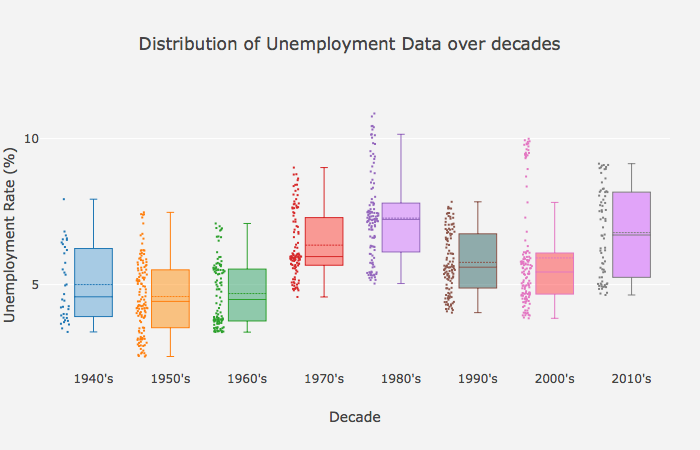

In [83]:
# Import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly
plotly.tools.set_credentials_file(username='sheelis', api_key='sGooOiRGRz1umLG16yt3')

%matplotlib inline

In [84]:
x_data = ["1940\'s", "1950\'s", "1960\'s", "1970\'s","1980\'s", "1990\'s","2000\'s", "2010\'s"]#unempl_infl_df.decade.unique().tolist()

y0 = unempl_infl_df.loc[unempl_infl_df.decade==1940,'unemployment'] 
y1 = unempl_infl_df.loc[unempl_infl_df.decade==1950,'unemployment'] 
y2 = unempl_infl_df.loc[unempl_infl_df.decade==1960,'unemployment'] 
y3 = unempl_infl_df.loc[unempl_infl_df.decade==1970,'unemployment'] 
y4 = unempl_infl_df.loc[unempl_infl_df.decade==1980,'unemployment'] 
y5 = unempl_infl_df.loc[unempl_infl_df.decade==1990,'unemployment'] 
y6 = unempl_infl_df.loc[unempl_infl_df.decade==2000,'unemployment'] 
y7 = unempl_infl_df.loc[unempl_infl_df.decade==2010,'unemployment']

y_data = [y0,y1,y2,y3,y4,y5,y6,y7]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
          'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(44, 100, 101, 0.5)',
          'rgba(255, 65, 67, 0.5)', 'rgba(207, 87, 255, 0.5)']


traces = []

for xd, yd, color in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            whiskerwidth=0.2,
            fillcolor=color,
            marker=dict(
                size=2,
            ),
            boxmean=True,    
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Unemployment Data over decades',
    xaxis=dict(
        title='Decade'
    ),
    yaxis=dict(
        title='Unemployment Rate (%)',
        autorange=True,
        showgrid=True,
        zeroline=False,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
#        zerolinecolor='rgb(255, 255, 255)',
#        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)

### Box Plots for inflation rate in decades
The box plot of inflation rate in different decades(the code is available below and the interactive plot in the link below)

Please click the Link to the see the interactive plot : https://plot.ly/create/?fid=sheelis:3

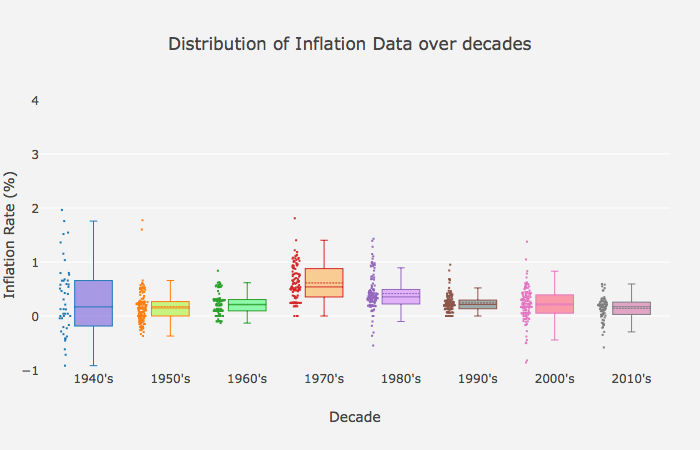

In [85]:
x_data = ["1940\'s", "1950\'s", "1960\'s", "1970\'s","1980\'s", "1990\'s","2000\'s", "2010\'s"]#unempl_infl_df.decade.unique().tolist()

y0 = unempl_infl_df.loc[unempl_infl_df.decade==1940,'inflation'] 
y1 = unempl_infl_df.loc[unempl_infl_df.decade==1950,'inflation'] 
y2 = unempl_infl_df.loc[unempl_infl_df.decade==1960,'inflation'] 
y3 = unempl_infl_df.loc[unempl_infl_df.decade==1970,'inflation'] 
y4 = unempl_infl_df.loc[unempl_infl_df.decade==1980,'inflation'] 
y5 = unempl_infl_df.loc[unempl_infl_df.decade==1990,'inflation'] 
y6 = unempl_infl_df.loc[unempl_infl_df.decade==2000,'inflation'] 
y7 = unempl_infl_df.loc[unempl_infl_df.decade==2010,'inflation']

y_data = [y0,y1,y2,y3,y4,y5,y6,y7]

colors = ['rgba(93, 64, 214, 0.5)', 'rgba(155, 244, 14, 0.5)', 'rgba(44, 260, 101, 0.5)',
          'rgba(255, 165, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(74, 100, 101, 0.5)',
          'rgba(255, 65, 97, 0.5)', 'rgba(207, 87, 155, 0.5)']


traces = []

for xd, yd, color in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            whiskerwidth=0.2,
            fillcolor=color,
            marker=dict(
                size=2,
            ),
            boxmean=True,    
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Inflation Data over decades',
    xaxis=dict(
        title='Decade'
    ),
    yaxis=dict(
        title='Inflation Rate (%)',
        autorange=False,
        showgrid=True,
        zeroline=False,
        dtick=1,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
#        zerolinecolor='rgb(255, 255, 255)',
#        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)

### Scatter Plots of unemployment rate vs  inflation rate in decades

Link to the plot : https://plot.ly/create/?fid=sheelis:9


#### Critique on William Phillips’s theory 
US Phillips Curve (1947 – 2017): The data points in this graph span  from 1947 until 2017. After 1980's they do not form the classic L-shape the short-run Phillips curve would predict. Although it was shown to be stable until the 1960’s, the Phillips curve inverse relationship between unemployment and inflation  became unstable  – after the 1970’s.

## Dashboard 
https://plot.ly/dashboard/sheelis:12/present

### Line Graph of unemployment rate vs  inflation rate after 1980s
####  Critique on William Phillips’s theory 
What happens after the 80s was there are periods when unemployment increased but inflation didn't decrease meaning there was no inverse relationship (in Philip theory unemployment should have increased to satisfy an inverse relationship). 


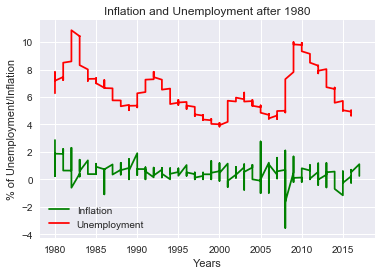

In [86]:
year_var=1980

#Data after 1980
y_df=unempl_infl_df.loc[unempl_infl_df.Year>=year_var,:]

# list of the years that we will use as our x axis
years = y_df.Year

# line that will be used to track inflation over the years (magnified 3 times to magnify the variablity)
plt.plot(years, y_df.inflation*2, color="green", label="Inflation")

# line that will be used to track unemployment over the years
plt.plot(years, y_df.unemployment, color="red", label="Unemployment")

# legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title( "Inflation and Unemployment after %s" %(year_var))
plt.xlabel("Years")
plt.ylabel("% of Unemployment/Inflation")

# Print our chart to the screen
plt.show()
#Save the chart
plt.savefig("Output/Unemployment and infl over years.png",dpi=200,format='png')

### Line Graph of unemployment rate vs  inflation rate on decades

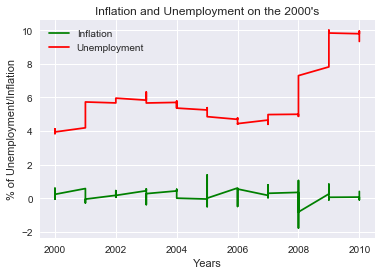

In [87]:
deacde_var=2000

#Data in decade
d_df=unempl_infl_df.loc[unempl_infl_df.decade==deacde_var,:]


# list of the years that we will use as our x axis
years = d_df.Year

# line that will be used to track inflation over the years (magnified 3 times to magnify the variablity)
plt.plot(years, d_df.inflation, color="green", label="Inflation")

# line that will be used to track unemployment over the years
plt.plot(years, d_df.unemployment, color="red", label="Unemployment")

# legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title( "Inflation and Unemployment on the %s's" %(deacde_var))
plt.xlabel("Years")
plt.ylabel("% of Unemployment/Inflation")

# Print our chart to the screen
plt.show()
#Save the chart
plt.savefig("Output/Unemployment and infl over years.png",dpi=200,format='png')

### Linear regression of unemployment rate vs  inflation rate on decades
#### R-squared in 1960s is 0.344855014644 and R-squared in 1980s is 0.00995878867512
##### The 1960s data are more close to the regression line which shows inverse relationship of unemployment and inflation as compared to the 1980s data.

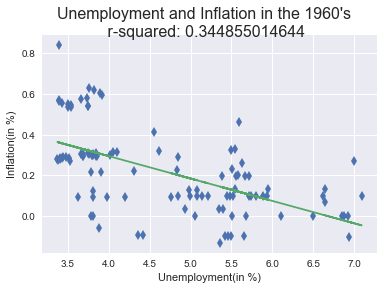

r-squared: 0.344855014644


In [88]:
from scipy.stats import linregress

deacde_var=1960

#Data in decade
d_df=unempl_infl_df.loc[unempl_infl_df.decade==deacde_var,:]


x_axis = d_df.unemployment
y_axis =  d_df.inflation

(slope, intercept, rvalue, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
# print(x_axis,'\n',slope,'\n', intercept,'\n',fit,'\n')
#plot
fig, ax = plt.subplots()

fig.suptitle("Unemployment and Inflation in the %s's\n r-squared: %s"%(deacde_var,rvalue**2), fontsize=16 )

ax.set_xlabel("Unemployment(in %)")
ax.set_ylabel("Inflation(in %)")

ax.plot(x_axis, y_axis, linewidth=0, marker='d')
ax.plot(x_axis, fit)
plt.show()
# plt.savefig("Output/Regression Unemp and infl2 in the %s's.png"%(deacde_var),dpi=200,format='png')
print("r-squared:", rvalue**2)

## Exploring the relationship between inflation and the unemployment rate from a unique perspective not previously explored by William Phillips
#### Downloaded data on  Personal Consumption Expenditure (PCE) index and Real GDP data provided on the Bureau of Economic Analysis(BEA). I already checked to accesses the PCE and Real GDP using BEA Data API, but they were not available in the list to be provided by the API services
I calculated the inflation using the PCE excluding food and energy

In [89]:
# Read csv of  Real GDP data
GDP_df = pd.read_csv("raw_data/ Real Gross Domestic Product, Quantity Indexes.csv")
#display the whole dataframe
GDP_df.head()

,Year,Gross domestic product,Personal consumption expenditures,Goods,Services,Gross private domestic investment,Fixed investment,Exports,Federal,National defense,Nondefense,State and local
0,1947,13.451,12.353,13.314,10.981,11.528,11.644,5.381,19.546,25.200,10.168,12.163
1,1948,14.009,12.632,13.582,11.271,14.530,12.743,4.238,20.667,25.036,13.746,12.894
2,1949,13.933,12.983,13.993,11.542,11.228,11.685,4.199,22.407,26.021,16.981,14.811
3,1950,15.147,13.816,15.078,12.047,15.640,13.884,3.677,21.474,25.916,14.482,16.005
4,1951,16.368,14.032,14.898,12.758,15.678,13.321,4.506,35.102,48.533,12.370,16.133


In [90]:
# Read CSV of PCE index
PCE_df = pd.read_csv("raw_data/PCEI by Major Type of Product, Monthly.csv")
#display the whole dataframe
PCE_df.head()

,Year_Month,Personal consumption expenditures (PCE),PCE excluding food and energy
0,1959M01,17.124,17.597
1,1959M02,17.138,17.609
2,1959M03,17.149,17.627
3,1959M04,17.183,17.670
4,1959M05,17.191,17.690


In [91]:
#create new Year and Month column in PCE_df
PCE_df["Year"]=""
PCE_df["Month"]=""

#split the the Year_month column
PCE_df.Year=(PCE_df.Year_Month.str.split(pat='M',expand=True)[0]).astype(int)
PCE_df.Month=PCE_df.Year_Month.str.split(pat='M',expand=True)[1].astype(int)

In [92]:
PCE_df.head()

,Year_Month,Personal consumption expenditures (PCE),PCE excluding food and energy,Year,Month
0,1959M01,17.124,17.597,1959,1
1,1959M02,17.138,17.609,1959,2
2,1959M03,17.149,17.627,1959,3
3,1959M04,17.183,17.670,1959,4
4,1959M05,17.191,17.690,1959,5


In [93]:
#check the data dtypes
PCE_df.dtypes

Year_Month                                      object
    Personal consumption expenditures (PCE)    float64
  PCE excluding food and energy                float64
Year                                             int64
Month                                            int64
dtype: object

In [94]:
#merge the dataframes GDP_df and PCE_df  with the unemploymet and inflation data in the data frame unempl_infl_df
GDP_Unemp_inf_df=pd.merge(unempl_infl_df, GDP_df,how='left', on = "Year")
PCE_GDP_Unemp_inf_df=pd.merge(GDP_Unemp_inf_df, PCE_df,how='left', on = ["Year","Month"])

#check the count
print(PCE_GDP_Unemp_inf_df.shape)
print(type(PCE_GDP_Unemp_inf_df))

#display the data frame
PCE_GDP_Unemp_inf_df.head()

(842, 23)
<class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,Year,Month,unemployment_level,civilian_labor_force,inflation_level,unemployment,inflation,decade,Gross domestic product,...,Gross private domestic investment,Fixed investment,Exports,Federal,National defense,Nondefense,State and local,Year_Month,Personal consumption expenditures (PCE),PCE excluding food and energy
0,0,1948,1,2034.0,60230.0,23.68,3.377055,1.153353,1940,14.009,...,14.53,12.743,4.238,20.667,25.036,13.746,12.894,NaN,NaN,NaN
1,1,1948,2,2328.0,60230.0,23.67,3.865183,-0.042230,1940,14.009,...,14.53,12.743,4.238,20.667,25.036,13.746,12.894,NaN,NaN,NaN
2,2,1948,3,2399.0,60230.0,23.50,3.983065,-0.718209,1940,14.009,...,14.53,12.743,4.238,20.667,25.036,13.746,12.894,NaN,NaN,NaN
3,3,1948,4,2386.0,60535.0,23.82,3.941521,1.361702,1940,14.009,...,14.53,12.743,4.238,20.667,25.036,13.746,12.894,NaN,NaN,NaN
4,4,1948,5,2118.0,60535.0,24.01,3.498802,0.797649,1940,14.009,...,14.53,12.743,4.238,20.667,25.036,13.746,12.894,NaN,NaN,NaN


In [95]:
#output the merged dataframe
# PCE_GDP_Unemp_inf_df.to_csv("output/merged_additional_data2.csv")

In [96]:
#realod  the merged dataframe
Allmerged_additional_df=pd.read_csv("output/merged_additional_data.csv")
Allmerged_additional_df.head()

,Unnamed: 0,Unnamed: 0.1,Year,Month,unemployment_level,civilian_labor_force,inflation_level,unemployment,inflation,decade,...,Fixed investment,Exports,Federal,National defense,Nondefense,State and local,Year_Month,Personal consumption expenditures (PCE),PCE excluding food and energy,inflation_PCE
0,0,0,1948,1,2034.0,60230.0,23.68,3.377055,1.153353,1940,...,12.743,4.238,20.667,25.036,13.746,12.894,NaN,NaN,NaN,0.001
1,1,1,1948,2,2328.0,60230.0,23.67,3.865183,-0.042230,1940,...,12.743,4.238,20.667,25.036,13.746,12.894,NaN,NaN,NaN,NaN
2,2,2,1948,3,2399.0,60230.0,23.50,3.983065,-0.718209,1940,...,12.743,4.238,20.667,25.036,13.746,12.894,NaN,NaN,NaN,NaN
3,3,3,1948,4,2386.0,60535.0,23.82,3.941521,1.361702,1940,...,12.743,4.238,20.667,25.036,13.746,12.894,NaN,NaN,NaN,NaN
4,4,4,1948,5,2118.0,60535.0,24.01,3.498802,0.797649,1940,...,12.743,4.238,20.667,25.036,13.746,12.894,NaN,NaN,NaN,NaN


In [97]:
# Check data type
Allmerged_additional_df.dtypes

Unnamed: 0                                       int64
Unnamed: 0.1                                     int64
Year                                             int64
Month                                            int64
unemployment_level                             float64
civilian_labor_force                           float64
inflation_level                                float64
unemployment                                   float64
inflation                                      float64
decade                                           int64
        Gross domestic product                 float64
Personal consumption expenditures              float64
    Goods                                      float64
    Services                                   float64
Gross private domestic investment              float64
    Fixed investment                           float64
    Exports                                    float64
    Federal                                    float64
        Na

In [98]:
# CALCULATE inflation rate based on PCE excluding food and energy 
for i in range(len(Allmerged_additional_df.Month)):

    #inflation rate based on PCE index
    Allmerged_additional_df.iloc[i,24]=((Allmerged_additional_df.iloc[i,23]-Allmerged_additional_df.iloc[i-1,23])\
                                        /Allmerged_additional_df.iloc[i-1,23])*100
    
# Allmerged_additional_df.loc[Allmerged_additional_df.inflation_PCE>0,: ]
Allmerged_additional_df.head()

,Unnamed: 0,Unnamed: 0.1,Year,Month,unemployment_level,civilian_labor_force,inflation_level,unemployment,inflation,decade,...,Fixed investment,Exports,Federal,National defense,Nondefense,State and local,Year_Month,Personal consumption expenditures (PCE),PCE excluding food and energy,inflation_PCE
0,0,0,1948,1,2034.0,60230.0,23.68,3.377055,1.153353,1940,...,12.743,4.238,20.667,25.036,13.746,12.894,NaN,NaN,NaN,NaN
1,1,1,1948,2,2328.0,60230.0,23.67,3.865183,-0.042230,1940,...,12.743,4.238,20.667,25.036,13.746,12.894,NaN,NaN,NaN,NaN
2,2,2,1948,3,2399.0,60230.0,23.50,3.983065,-0.718209,1940,...,12.743,4.238,20.667,25.036,13.746,12.894,NaN,NaN,NaN,NaN
3,3,3,1948,4,2386.0,60535.0,23.82,3.941521,1.361702,1940,...,12.743,4.238,20.667,25.036,13.746,12.894,NaN,NaN,NaN,NaN
4,4,4,1948,5,2118.0,60535.0,24.01,3.498802,0.797649,1940,...,12.743,4.238,20.667,25.036,13.746,12.894,NaN,NaN,NaN,NaN


## Scatter plots showing the relationship of unemployment and PCE_inflation 
### The 1960's plot showed there is clear inverse relationship between unemployment and PCE_inflation as stated in the Philips curve theory. But this doesn't hold true for the 1980s data. 
### The other unique perspective is that using the inflation computed by PCE excluding food and energy showed clear relationship with unemployment as in Philips curve theory as compared to the CPI inflation.
Note: 1-Please change the decades of the  variable deacde_var to explore the relationship between PCE_inflation and unemployment in different decades
    2- Please change the year of the  variable year_var to explore the relationship between PCE_inflation and unemploymentin different decades


PLOT-1 :Which decade you want to plot? (only in 10s value eg 1960)1960
PLOT-2 :What is the starting  year for this plot ? (only in YYYY format eg 1983)1980
PLOT-2 :What is the ending year for this plot ? (only in YYYY format eg 2012)1989


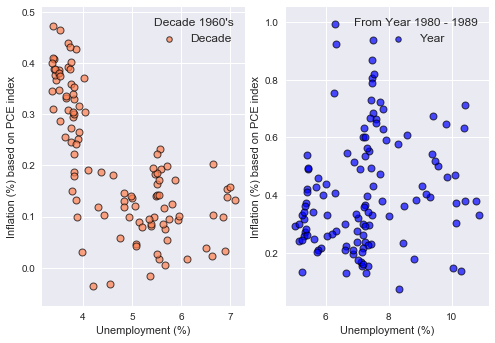

In [129]:
#INPUT data for the plotting the unemployment and the PCE index_Inflation
fig,ax=plt.subplots(1,2)

#variable to hold the decade and the year
deacde_var=input("PLOT-1 :Which decade you want to plot? (only in 10s value eg 1960)")
deacde_var=pd.to_numeric(deacde_var)

#query expression to hold the year range (in YYYY format)
year_var_start=input("PLOT-2 :What is the starting  year for this plot ? (only in YYYY format eg 1983)")
year_var_start=pd.to_numeric(year_var_start)


year_var_end=input("PLOT-2 :What is the ending year for this plot ? (only in YYYY format eg 2012)")
year_var_end=pd.to_numeric(year_var_end)

Year_query="Year>=%s and Year<=%s"%(year_var_start,year_var_end)



# Plotting the data accepted from the user
#Data in decade and range of years

d_df=Allmerged_additional_df.loc[Allmerged_additional_df.decade==deacde_var,:]

y_df=Allmerged_additional_df.query(Year_query)

#assign data to axes
x_axis = d_df.unemployment
y_axis =  d_df.inflation_PCE

x2_axis = y_df.unemployment
y2_axis =  y_df.inflation_PCE

#create the scatter plot
ax[0].scatter(x_axis,y_axis,c='coral',edgecolors='black',lw=1,alpha=0.7,marker='o',label='Decade')#,s=urbanDriverCount*7

ax[1].scatter(x2_axis,y2_axis,c='blue',edgecolors='black',lw=1,alpha=0.7,marker='o',label='Year')#,s=urbanDriverCount*7

#titles and axes labels
# plt[0].title=('Inflation versus unemployment for decade (%s)year (%s)'%(deacde_var,year_var))

ax[0].set_xlabel('Unemployment (%)')
ax[0].set_ylabel('Inflation (%) based on PCE index')

ax[1].set_xlabel('Unemployment (%)')
ax[1].set_ylabel('Inflation (%) based on PCE index')

#legend and legend handling
lgnd=ax[0].legend(fontsize="medium", mode="Expanded", 
                  numpoints=1, scatterpoints=1,title="Decade %s's"%(deacde_var), 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]

lgnd=ax[1].legend(fontsize="medium", mode="Expanded", 
                  numpoints=1, scatterpoints=1,title="From Year %s - %s"%(year_var_start,year_var_end), 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]

#add grids
sns.set(style="darkgrid", color_codes=True)
# ax.grid(True,color='white',fillstyle='bottom')
# # fig.tight_layout()
# ax.set_facecolor('brown')
plt.show()
# plt.savefig("output/unemp vs inlation for %'s and From Year %s - %s.png"%(deacde_var,year_var,year_var_end),format=png)